In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import cv2
%matplotlib inline

In [22]:
TRAIN_DATA_PATH = "..\\american-sign-language-dataset\\asl"

NUM_OF_LETTERS = 26 # "a" to "z"
IMAGE_SIZE = 50 #We'll be workign with 50 * 50 pixel images
NUM_OF_CHANNELS = 1 # Grayscale
NUM_OF_DENSE_LAYER_NODES = (IMAGE_SIZE * IMAGE_SIZE) // 2

LABELS = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n','o', 'p', 'q','r', 's', 't','u', 'v', 'w', 'x', 'y', 'z']
print(len(LABELS))

26


In [25]:
#appending image of each type in list
y_unique = []
x_unique = []
for alphabet in os.listdir('/content/asl_dataset'):
    for image in os.listdir('/content/asl_dataset'+str('a','b')+alphabet):
        X=imread('/content/asl_dataset'+str('c')+alphabet+str('d')+image)
        x_unique.append(X)
        y_unique.append(alphabet)
        break

TypeError: decoding str is not supported

In [26]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

#appending image of each type in list
y_unique = []
x_unique = []
for alphabet in os.listdir('/content/asl_dataset'):
    # Construct the path using os.path.join to ensure correct path separators
    alphabet_path = os.path.join('/content/asl_dataset', alphabet)
    # Get a list of images in the alphabet directory
    image_files = os.listdir(alphabet_path)

    # Process only the first image in the directory
    if image_files:
        image_path = os.path.join(alphabet_path, image_files[0])
        X = imread(image_path)
        x_unique.append(X)
        y_unique.append(alphabet)

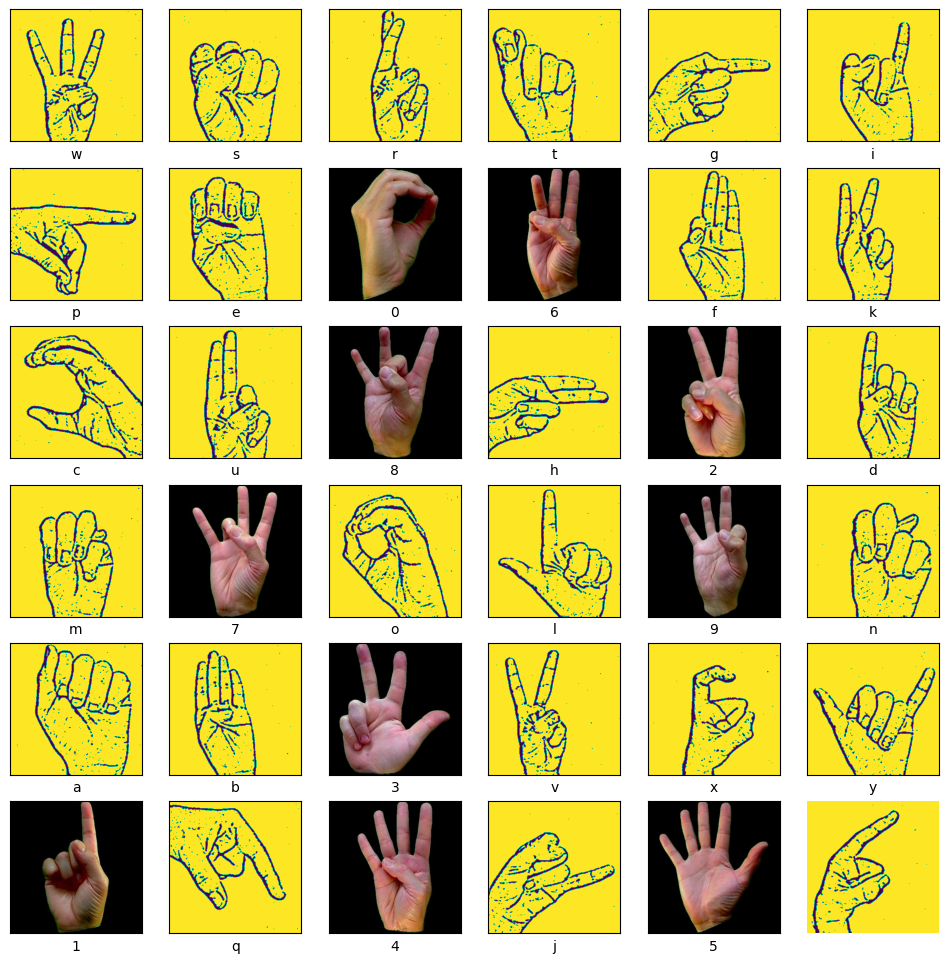

In [27]:
fig=plt.figure(figsize=(12,12))
for i in range(len(x_unique)):
    ax=fig.add_subplot(6,6,i+1)
    ax.imshow(x_unique[i])
    plt.xlabel(y_unique[i])
    plt.xticks([])
    plt.yticks([])
plt.axis('off')
plt.show()
fig.savefig('alphabet')

In [29]:
def create_data(DATA_PATH):
    x=[]
    y=[]
    paths=[]
    for label in LABELS:
        path = os.path.join('/content/asl_dataset', label)
        label_name = LABELS.index(label)
        for img in os.listdir(path):
            p=os.path.join(path, img)
            paths.append(p)
            print(p)
            try:
                img_array = cv2.imread(p)#os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
                x.append(img_array)
                y.append(label_name)
            except Exception as e:
                pass
    return x,y

X_train, y_train= create_data(TRAIN_DATA_PATH)


/content/asl_dataset/a/43.jpg
/content/asl_dataset/a/295.jpg
/content/asl_dataset/a/249.jpg
/content/asl_dataset/a/233.jpg
/content/asl_dataset/a/275.jpg
/content/asl_dataset/a/349.jpg
/content/asl_dataset/a/563.jpg
/content/asl_dataset/a/98.jpg
/content/asl_dataset/a/571.jpg
/content/asl_dataset/a/218.jpg
/content/asl_dataset/a/274.jpg
/content/asl_dataset/a/133.jpg
/content/asl_dataset/a/199.jpg
/content/asl_dataset/a/510.jpg
/content/asl_dataset/a/158.jpg
/content/asl_dataset/a/457.jpg
/content/asl_dataset/a/418.jpg
/content/asl_dataset/a/147.jpg
/content/asl_dataset/a/609.jpg
/content/asl_dataset/a/48.jpg
/content/asl_dataset/a/193.jpg
/content/asl_dataset/a/3.jpg
/content/asl_dataset/a/621.jpg
/content/asl_dataset/a/44.jpg
/content/asl_dataset/a/71.jpg
/content/asl_dataset/a/336.jpg
/content/asl_dataset/a/358.jpg
/content/asl_dataset/a/31.jpg
/content/asl_dataset/a/580.jpg
/content/asl_dataset/a/212.jpg
/content/asl_dataset/a/145.jpg
/content/asl_dataset/a/79.jpg
/content/asl_data

In [30]:
NUM_OF_TRAIN_IMAGES = len(X_train)
print(len(X_train))

4114


In [31]:
X_train=np.array(X_train)

In [32]:
X_train = X_train.reshape(NUM_OF_TRAIN_IMAGES, IMAGE_SIZE , IMAGE_SIZE, NUM_OF_CHANNELS)
print(X_train.shape)

(4114, 50, 50, 1)


In [33]:
X_train = X_train.astype("float32")
X_train /= 255.0


In [34]:
y_train = to_categorical(y_train, NUM_OF_LETTERS)
print(X_train.shape)


(4114, 50, 50, 1)


In [35]:
#Saving Data
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)

In [36]:
X_train=np.load("X_train.npy")
y_train=np.load("y_train.npy")

# Creating CNN Model

In [37]:
model = Sequential()

model.add(Conv2D(IMAGE_SIZE, (3, 3), padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, NUM_OF_CHANNELS), activation = "relu"))
model.add(Conv2D(IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), padding = "same", activation = "relu"))
model.add(Conv2D(2 * IMAGE_SIZE, (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(NUM_OF_DENSE_LAYER_NODES, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(NUM_OF_LETTERS, activation = "softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling CNN Model

In [38]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 50)          │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 50)          │          22,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 100)         │          45,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 100)         │          90,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12100)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1250)                │      15,126,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1250)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │          32,526 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,317,026 (58.43 MB)

 Trainable params: 15,317,026 (58.43 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [40]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 52,
    epochs = 5,
    shuffle = True
)

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.1578 - loss: 2.9315
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8412 - loss: 0.4989
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9504 - loss: 0.1665
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9774 - loss: 0.0675
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9804 - loss: 0.0504


# Saving Model for future use

In [41]:
#Saving Model
from keras.models import load_model
model.save('model.h5')